# Variance Reduction in SGD

[link](https://ut.philkr.net/deeplearning/deep_networks/variance_reduction_in_sgd/)

In [14]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from model.architectures import MLP

## Variance of Mini-batches

Variance of SGD with minibatches

Let denote by $\mathcal{B}_i$ the $i$-th batch which is uniformly randomly selected and each sample $(X,Y)=(x,y)$ is uniformly randomly selected in in the dataset. Consither the random variable
$$
\begin{align*}
Z(i) = \mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right],
\end{align*}
$$
where $\ell$ is the loss funciton and $\theta" are the learnable model parameters.

From the Law of total expectation, we have

$$
\begin{align*}
\mathbb{E}\left[\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right]=\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right],
\end{align*}
$$

then we have that the vriace of minibatch-SGD is 
$$
\begin{align*}
\sigma^2_{MB}&=\mathbb{E}[(Z-\mathbb{E}[Z])^2]=\mathbb{E}[Z^2]-\mathbb{E}[Z]^2,\\
&=\mathbb{E}\left[\left(\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right)^2\right]-\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right]^2
\end{align*}
$$

If we take bathch_size = 1, then $X,Y\in\mathcal{B}_i$ is deterministic and  we get that the SGD variance is 

$$
\begin{align*}
\sigma^2_{S}&=\mathbb{E}\left[\left(\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right)^2\right]-\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right]^2,\\
&=\mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]-\mathbb{E}\left[\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right]^2
\end{align*}
$$

Then, the variance reduction is

$$
\begin{align*}
\sigma^2_{S}-\sigma_{MB}^2&=\mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]- \mathbb{E}\left[\left(\mathbb{E}\left[\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right| X,Y \in \mathcal{B}_i\right]\right)^2\right],\\
&\geq \mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]- \mathbb{E}\left[\mathbb{E}\left[\left(\left.\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right| X,Y \in \mathcal{B}_i\right]\right],\\
&= \mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right]- \mathbb{E}\left[\left(\frac{\partial}{\partial \theta}  \ell (\theta|X,Y)\right)^2\right],\\
&=0.
\end{align*}
$$

Then we have proved that minibatch GD never increases the variance of SGD: $\sigma^2_{S}\geq \sigma^2_{MB}$.

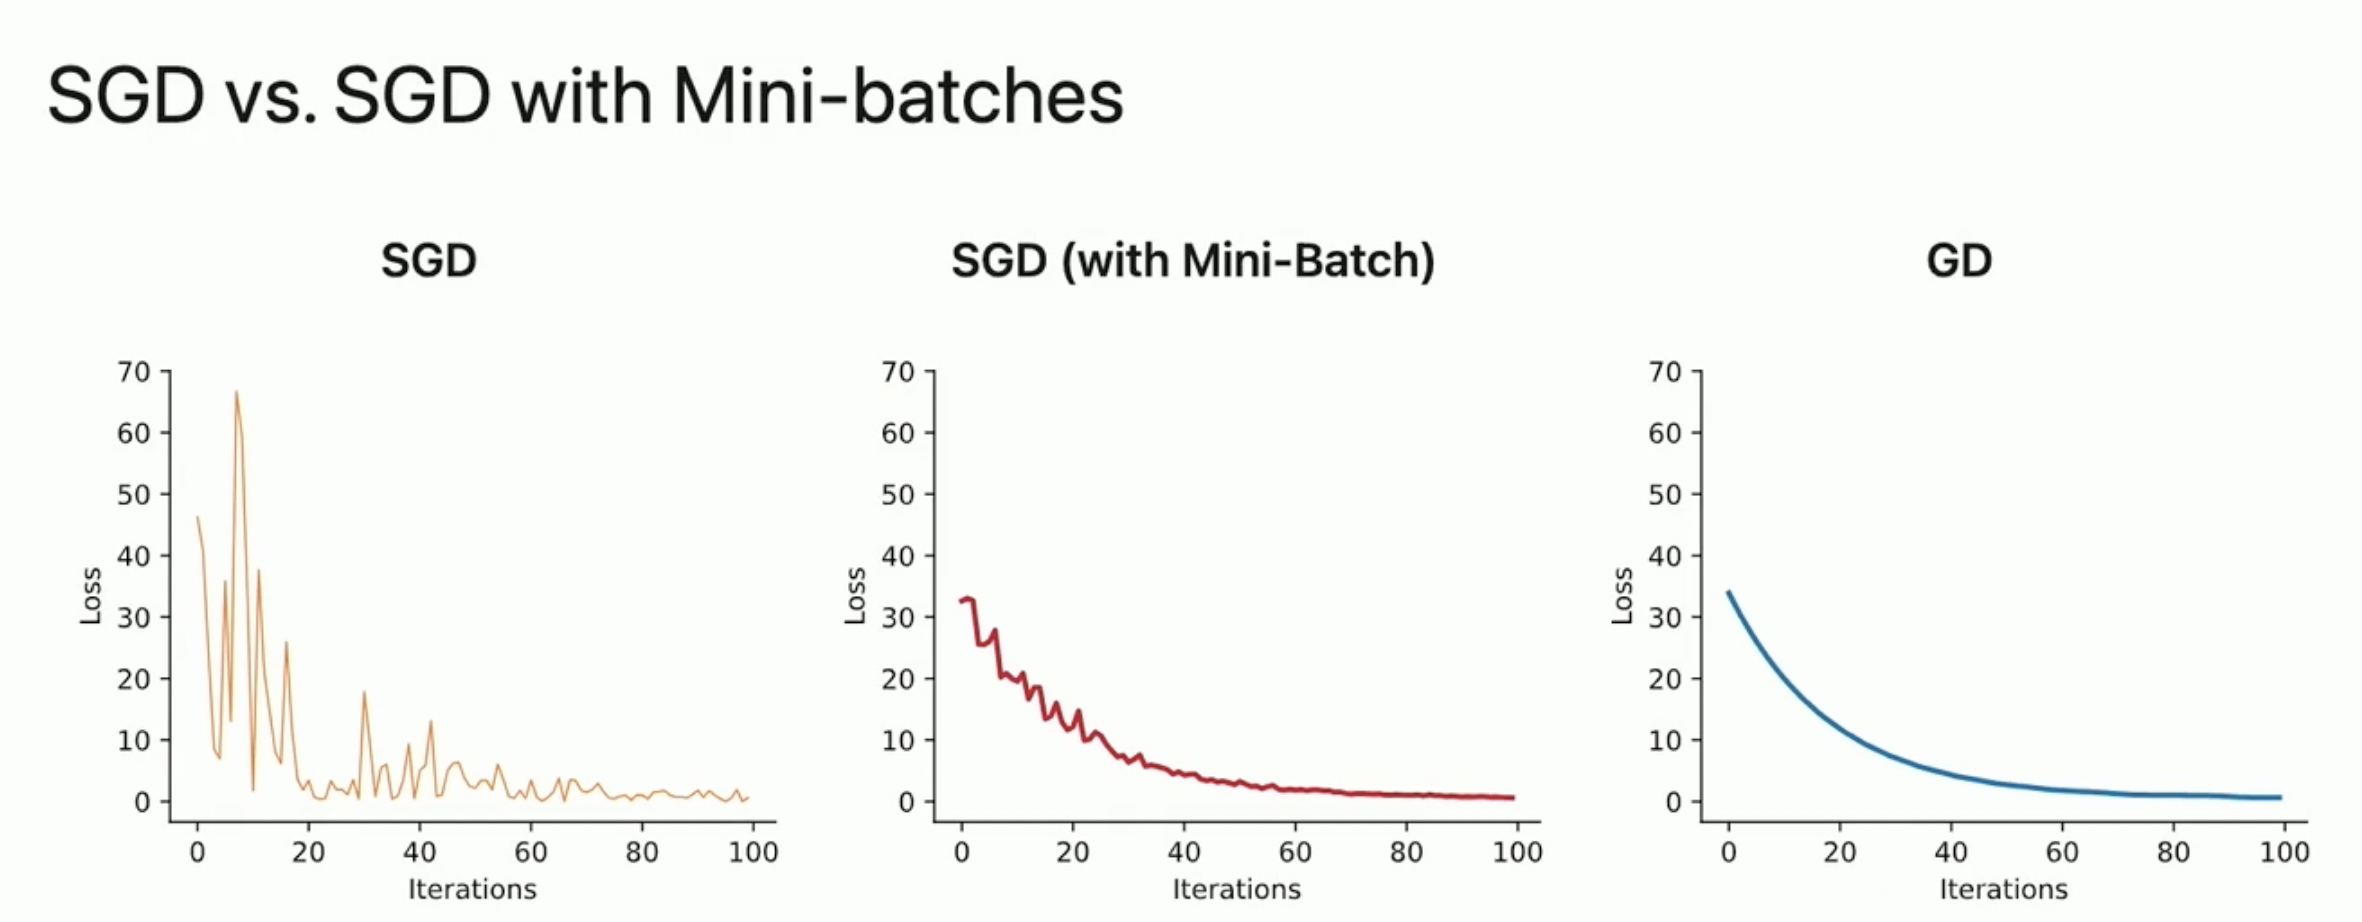

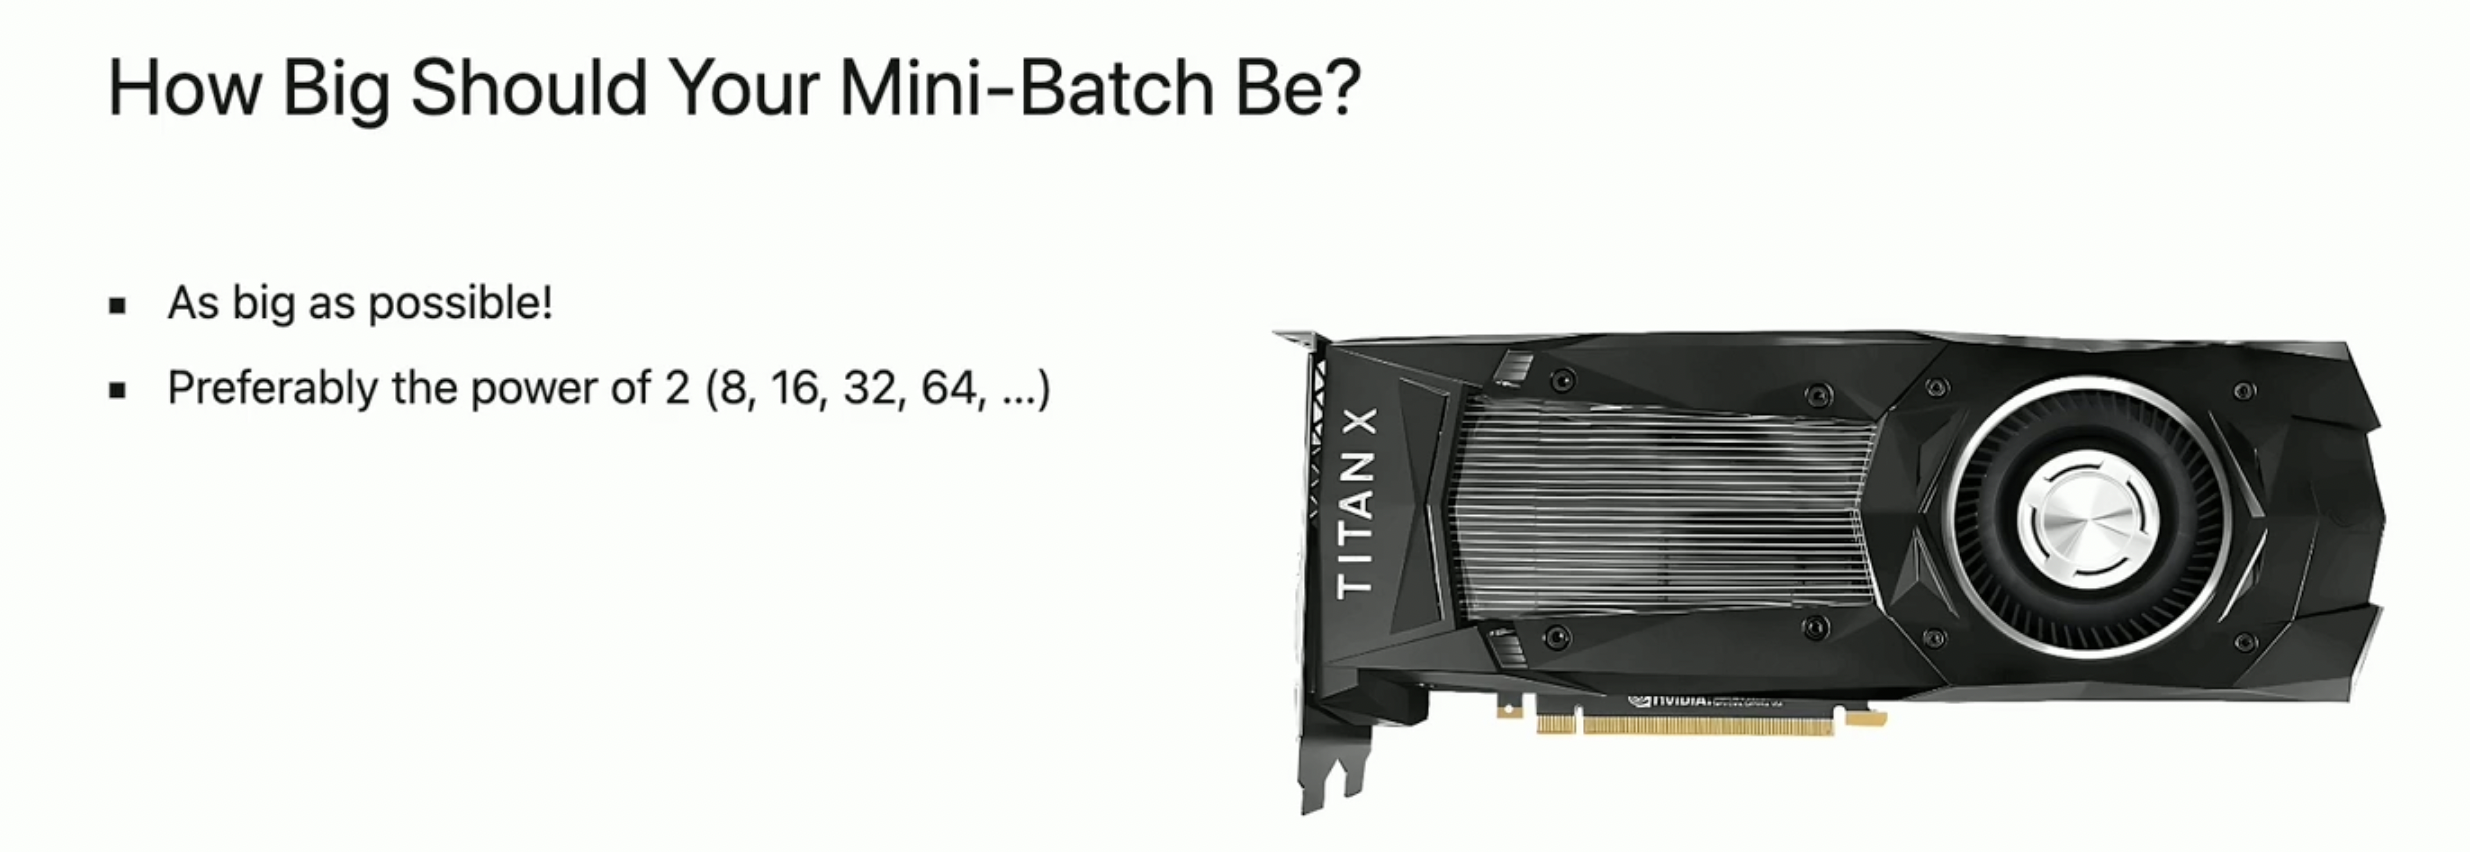

## Momentum

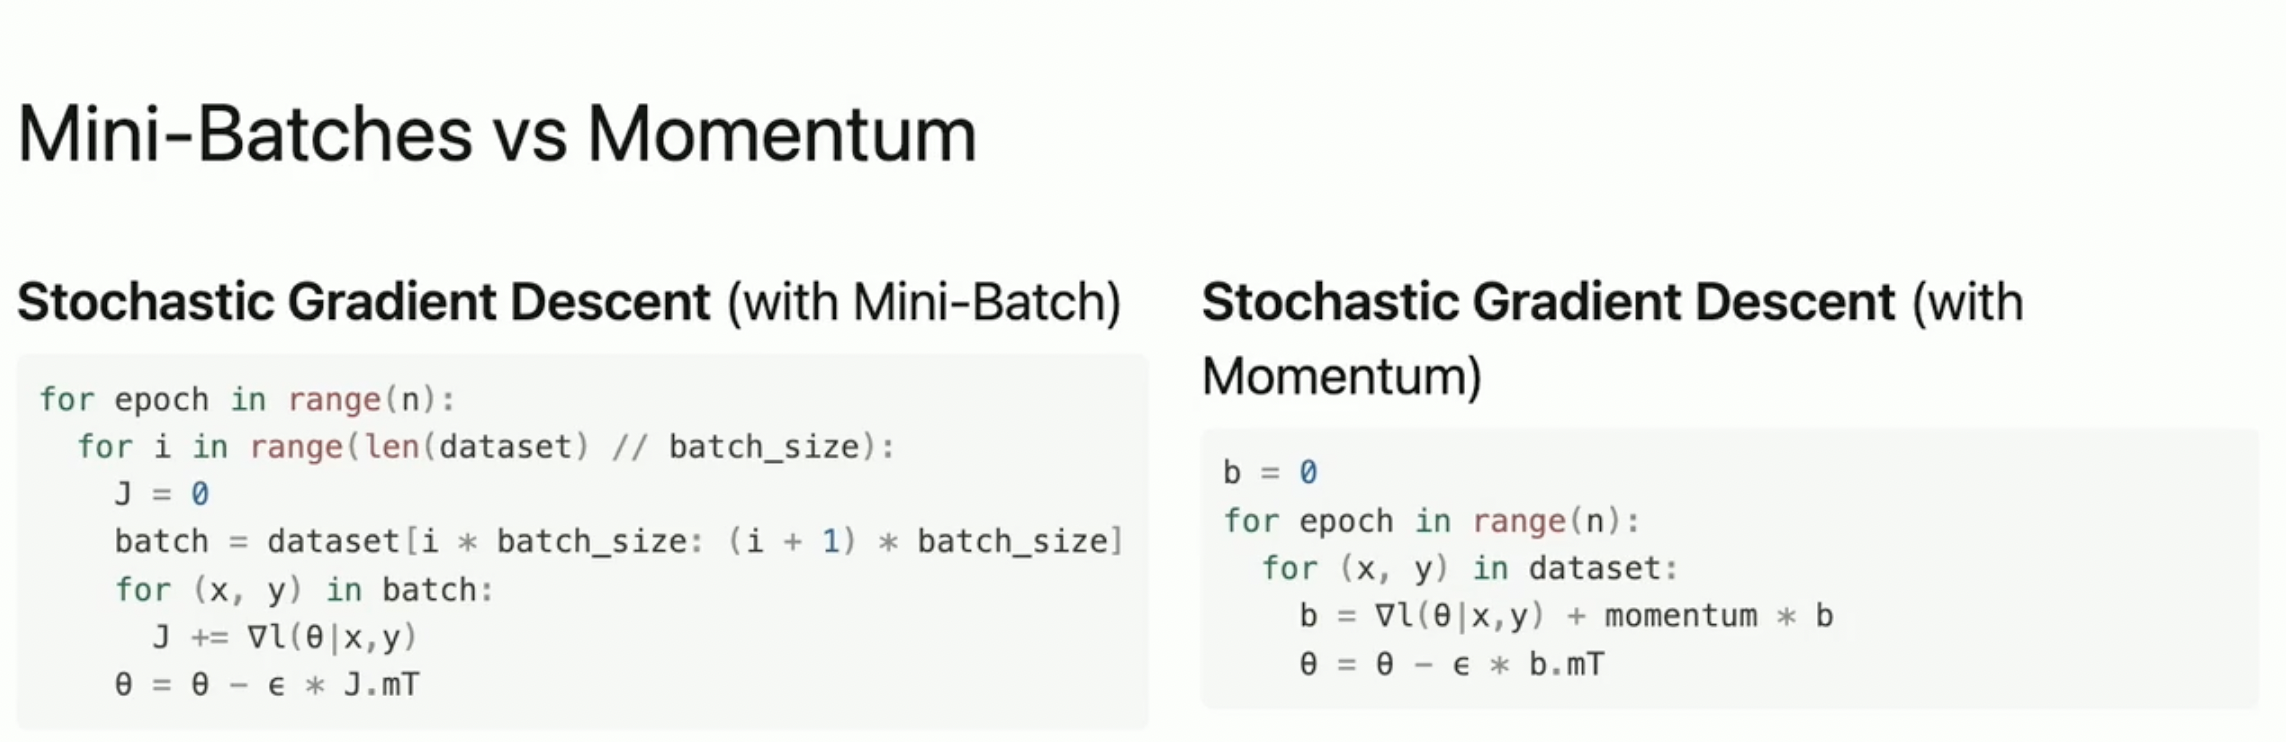

In [15]:
f = lambda x: 1+2*x**2

N = 32
xs = (4*torch.rand(N)-2)[:,None]
ys = f(xs) + 0.5*torch.randn(N,1)
x = torch.linspace(-2,2,100)

dataset = TensorDataset(xs, ys)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

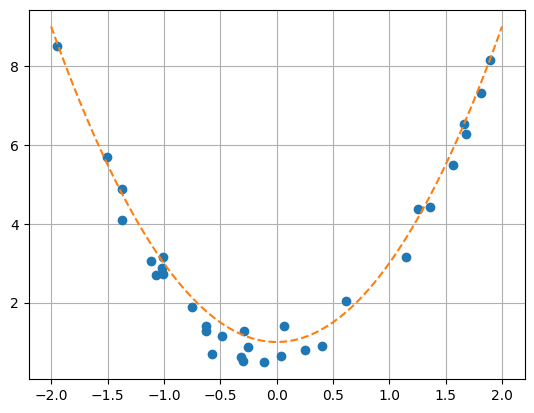

In [16]:
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o')
plt.plot(x.detach().numpy(), f(x).detach().numpy(), '--')
plt.grid()
plt.show()

In [17]:
model = MLP(input_dim=1, hidden_dim=[64,64], output_dim=1)
loss_fn = nn.MSELoss()  
lr = 0.01
opt = torch.optim.SGD(model.parameters(), lr=lr)

model.train()
losses = []
for epoch in range(1000):
    for xs, ys in data_loader:
        preds = model(xs)
        loss  = loss_fn(preds, ys)
        loss.backward()
        opt.step()
        opt.zero_grad()  

        losses.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 15.737131118774414
Epoch 10, Loss: 3.0203118324279785
Epoch 20, Loss: 1.9864659309387207
Epoch 30, Loss: 1.3301540613174438
Epoch 40, Loss: 0.8471906781196594
Epoch 50, Loss: 0.519822895526886
Epoch 60, Loss: 0.328651487827301
Epoch 70, Loss: 0.2328619658946991
Epoch 80, Loss: 0.19032210111618042
Epoch 90, Loss: 0.1708875596523285
Epoch 100, Loss: 0.16096240282058716
Epoch 110, Loss: 0.15520499646663666
Epoch 120, Loss: 0.15035071969032288
Epoch 130, Loss: 0.14597469568252563
Epoch 140, Loss: 0.14169608056545258
Epoch 150, Loss: 0.13776586949825287
Epoch 160, Loss: 0.1346583068370819
Epoch 170, Loss: 0.1314985156059265
Epoch 180, Loss: 0.12850171327590942
Epoch 190, Loss: 0.12572164833545685
Epoch 200, Loss: 0.12290143221616745
Epoch 210, Loss: 0.12013383954763412
Epoch 220, Loss: 0.11761023849248886
Epoch 230, Loss: 0.11535967886447906
Epoch 240, Loss: 0.11311869323253632
Epoch 250, Loss: 0.11133294552564621
Epoch 260, Loss: 0.10973507165908813
Epoch 270, Loss: 0.108250

## Evaluate

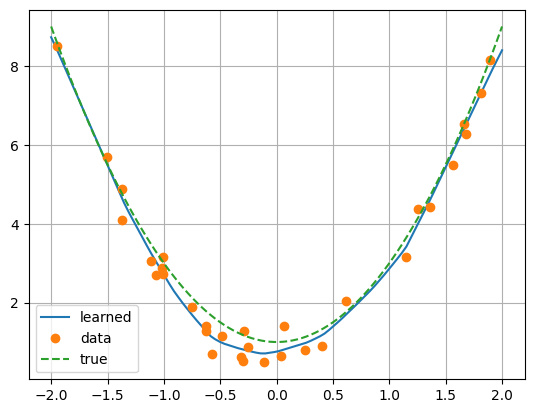

In [18]:
plt.plot(x,model(x[:,None]).squeeze().detach().numpy(), '-',label='learned')
plt.plot(xs[:,0].detach().numpy(), ys[:,0].detach().numpy(), 'o',label='data')
plt.plot(x,f(x), '--',label='true')
plt.legend()
plt.grid()
plt.show()